In [15]:
import pandas as pd

df = pd.read_csv('./data/sales_new.csv')

<Axes: xlabel='Product'>

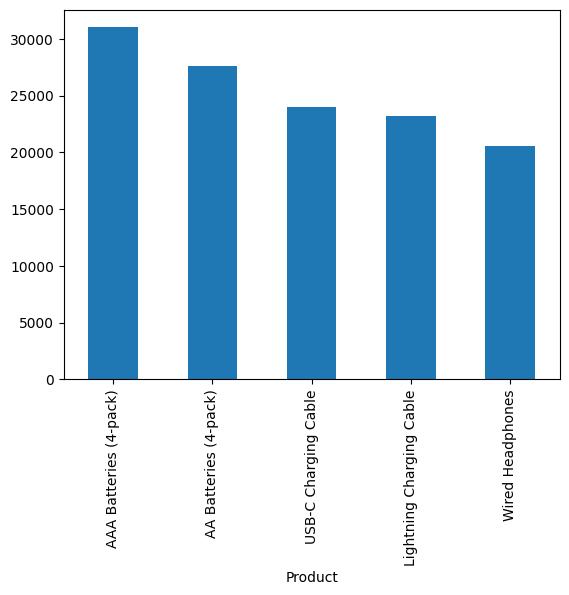

In [16]:
top_5_products = df.groupby("Product")["Quantity Ordered"].sum().nlargest(5)
top_5_products.plot(kind="bar")

In [17]:
df['zip'] = df['Purchase Address'].str[-5:]
df.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0    176558        USB-C Charging Cable                 2       11.95   
1    176559  Bose SoundSport Headphones                 1       99.99   
2    176560                Google Phone                 1      600.00   
3    176560            Wired Headphones                 1       11.99   
4    176561            Wired Headphones                 1       11.99   

            Order Date                      Purchase Address    zip  
0  2023-04-19 08:46:00          917 1st St, Dallas, TX 75001  75001  
1  2023-04-07 22:30:00     682 Chestnut St, Boston, MA 02215  02215  
2  2023-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001  90001  
3  2023-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001  90001  
4  2023-04-30 09:27:00     333 8th St, Los Angeles, CA 90001  90001

In [47]:
import pgeocode 
nomi = pgeocode.Nominatim('us') 
nomi.query_postal_code("36067") 

zip_cache = {}

# Function to convert zip codes to lat, long
def get_lat_lon(zip_code):

    if zip_code in zip_cache:
        return zip_cache[zip_code]
    
    location = nomi.query_postal_code(zip_code)
    print(location.latitude)
    if location.latitude != 0:
        output = (location.latitude, location.longitude)
        zip_cache[zip_code] = output
        return output
    else:
        return (None, None)

# Apply the function to the DataFrame
df['coords'] = df['zip'].apply(get_lat_lon)




32.96
42.3471
33.9731
37.7058
47.6114
33.8444
40.7484
45.4147
30.3264
43.6606


In [48]:
df.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0    176558        USB-C Charging Cable                 2       11.95   
1    176559  Bose SoundSport Headphones                 1       99.99   
2    176560                Google Phone                 1      600.00   
3    176560            Wired Headphones                 1       11.99   
4    176561            Wired Headphones                 1       11.99   

            Order Date                      Purchase Address    zip  \
0  2023-04-19 08:46:00          917 1st St, Dallas, TX 75001  75001   
1  2023-04-07 22:30:00     682 Chestnut St, Boston, MA 02215  02215   
2  2023-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001  90001   
3  2023-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001  90001   
4  2023-04-30 09:27:00     333 8th St, Los Angeles, CA 90001  90001   

                 coords  
0     (32.96, -96.8385)  
1   (42.3471, -71.1027)  
2  (33.9731, -118.2479)  
3  (33.9731, -118.2479)  
4  (33.9731, -118.2479)

In [46]:
get_lat_lon("03242")

43.1791


(43.1791, -71.8159)

In [52]:
import folium
from folium.plugins import HeatMap
import pandas as pd

# Create a map centered roughly in the middle of the US
map = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Prepare the data for the HeatMap; each entry in heatmap_data is (lat, lon, weight)
heatmap_data = [(coords[0], coords[1], qty) for coords, qty in zip(df['coords'], df['Quantity Ordered'])]

# Add HeatMap to the map
HeatMap(heatmap_data).add_to(map)

map  # If using Jupyter Notebook, this will display the map inline

In [53]:
df.to_csv('sales_with_coords.csv',index=False)

In [59]:
df['lat'] = df['coords']

In [75]:
import pandas as pd

# Assuming your DataFrame is named "df"
# df.drop(columns='lat', inplace=True)
df['coords']

# df['lat'] = df['lat'].astype(float)
# df['long'] = df['long'].astype(float)

# # Drop the original "coords" column if desired
# # df = df.drop('coords', axis=1)


0            (32.96, -96.8385)
1          (42.3471, -71.1027)
2         (33.9731, -118.2479)
3         (33.9731, -118.2479)
4         (33.9731, -118.2479)
                  ...         
185945    (33.9731, -118.2479)
185946    (37.7058, -122.4619)
185947    (37.7058, -122.4619)
185948    (37.7058, -122.4619)
185949    (37.7058, -122.4619)
Name: coords, Length: 185950, dtype: object

In [76]:
df = pd.read_csv('./data/sales_with_coords.csv')
df.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0    176558        USB-C Charging Cable                 2       11.95   
1    176559  Bose SoundSport Headphones                 1       99.99   
2    176560                Google Phone                 1      600.00   
3    176560            Wired Headphones                 1       11.99   
4    176561            Wired Headphones                 1       11.99   

            Order Date                      Purchase Address    zip  \
0  2023-04-19 08:46:00          917 1st St, Dallas, TX 75001  75001   
1  2023-04-07 22:30:00     682 Chestnut St, Boston, MA 02215   2215   
2  2023-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001  90001   
3  2023-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001  90001   
4  2023-04-30 09:27:00     333 8th St, Los Angeles, CA 90001  90001   

                 coords  
0     (32.96, -96.8385)  
1   (42.3471, -71.1027)  
2  (33.9731, -118.2479)  
3  (33.9731, -118.2479)  
4  (33.9731, -118.2479)

In [78]:
df[['lat','long']] = df['coords'].str.strip('()').str.split(',', expand=True)

In [81]:
df['lat'] = pd.to_numeric(df['lat'])
df['long'] = pd.to_numeric(df['long'])

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  int64  
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   zip               185950 non-null  int64  
 7   coords            185950 non-null  object 
 8   lat               185950 non-null  float64
 9   long              185950 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 14.2+ MB


In [83]:
df.drop(columns='coords', inplace=True)

In [85]:
df.to_csv('./data/sales_with_coords.csv',index=False)

In [3]:
import pandas as pd

df = pd.read_csv('./data/sales_with_coords.csv')



In [11]:
import janitor

In [12]:
df_new = df.clean_names()

In [13]:
df_new

order_id                     product  quantity_ordered  price_each  \
0         176558        USB-C Charging Cable                 2       11.95   
1         176559  Bose SoundSport Headphones                 1       99.99   
2         176560                Google Phone                 1      600.00   
3         176560            Wired Headphones                 1       11.99   
4         176561            Wired Headphones                 1       11.99   
...          ...                         ...               ...         ...   
185945    259353      AAA Batteries (4-pack)                 3        2.99   
185946    259354                      iPhone                 1      700.00   
185947    259355                      iPhone                 1      700.00   
185948    259356      34in Ultrawide Monitor                 1      379.99   
185949    259357        USB-C Charging Cable                 1       11.95   

                 order_date                         purchase_address    zip  \
0       2023-04-19 08:46:00             917 1st St, Dallas, TX 75001  75001   
1       2023-04-07 22:30:00        682 Chestnut St, Boston, MA 02215   2215   
2       2023-04-12 14:38:00     669 Spruce St, Los Angeles, CA 90001  90001   
3       2023-04-12 14:38:00     669 Spruce St, Los Angeles, CA 90001  90001   
4       2023-04-30 09:27:00        333 8th St, Los Angeles, CA 90001  90001   
...                     ...                                      ...    ...   
185945  2023-09-17 20:56:00   840 Highland St, Los Angeles, CA 90001  90001   
185946  2023-09-01 16:00:00  216 Dogwood St, San Francisco, CA 94016  94016   
185947  2023-09-23 07:39:00     220 12th St, San Francisco, CA 94016  94016   
185948  2023-09-19 17:30:00   511 Forest St, San Francisco, CA 94016  94016   
185949  2023-09-30 00:18:00   250 Meadow St, San Francisco, CA 94016  94016   

            lat      long           city  
0       32.9600  -96.8385         Dallas  
1       42.3471  -71.1027         Boston  
2       33.9731 -118.2479    Los Angeles  
3       33.9731 -118.2479    Los Angeles  
4       33.9731 -118.2479    Los Angeles  
...         ...       ...            ...  
185945  33.9731 -118.2479    Los Angeles  
185946  37.7058 -122.4619  San Francisco  
185947  37.7058 -122.4619  San Francisco  
185948  37.7058 -122.4619  San Francisco  
185949  37.7058 -122.4619  San Francisco  

[185950 rows x 10 columns]